In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

%matplotlib inline

5. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.

Take a look at the first 10 rows.

Look at the last 5 rows. Do you see a problem?

Redo the read_csv() call to correct this issue - do not modify the original csv file.

In [2]:
gdp_df = pd.read_csv("../data/gdp_per_capita.csv")

In [3]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN
6,Afghanistan,2012,1772.764974,NaN
7,Afghanistan,2011,1626.764793,NaN
8,Afghanistan,2010,1671.581238,NaN
9,Afghanistan,2009,1502.354073,NaN


In [4]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN
6729,footnoteSeqID,Footnote,NaN,NaN
6730,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [5]:
gdp_df = gdp_df[:-2] #Drop last two rows

In [6]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


6. Drop the 'Value Footnotes' column, and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [7]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6729 non-null   object 
 1   Year             6729 non-null   object 
 2   Value            6729 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), object(2)
memory usage: 210.4+ KB


In [8]:
gdp_df.drop(columns = "Value Footnotes") # also gdp_df.drop('Value Footnotes', axis = 1)

,Country or Area,Year,Value
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834
...,...,...,...
6724,Zimbabwe,1994,2768.309953
6725,Zimbabwe,1993,2572.870395
6726,Zimbabwe,1992,2591.007534
6727,Zimbabwe,1991,2906.272849


In [9]:
gdp_df.head() # changes above didn't save; assign to gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN


In [10]:
gdp_df = gdp_df.drop(columns = "Value Footnotes")

In [11]:
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


In [12]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6729 non-null   object 
 1   Year             6729 non-null   object 
 2   Value            6729 non-null   float64
dtypes: float64(1), object(2)
memory usage: 157.8+ KB


In [13]:
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

In [14]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


In [15]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6729 non-null   object 
 1   Year            6729 non-null   object 
 2   GDP_Per_Capita  6729 non-null   float64
dtypes: float64(1), object(2)
memory usage: 157.8+ KB


7. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it

-gdp_df has 6729 rows and 3 columns

-the data types are "objects" and floats (numeric values)

-now I need to fix the data vaguely stored as objects

In [16]:
gdp_df["Year"] = pd.to_numeric(gdp_df["Year"])

In [17]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6729 non-null   object 
 1   Year            6729 non-null   int64  
 2   GDP_Per_Capita  6729 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.8+ KB


In [18]:
gdp_df.shape # provides number of rows and then columns

(6729, 3)

In [19]:
gdp_df.Country.value_counts() # value counts for this column

Portugal                     29
Angola                       29
Burkina Faso                 29
Japan                        29
Egypt                        29
                             ..
Nauru                        12
Sint Maarten (Dutch part)     9
Turks and Caicos Islands      8
South Sudan                   8
Djibouti                      1
Name: Country, Length: 243, dtype: int64

8: Which years are represented in this dataset? 
-The years range from 2004 to 2018

Take a look at the number of observations per year. What do you notice?
-There are missing data for some years

In [20]:
gdp_df.Year.describe()

count    6729.000000
mean     2004.293357
std         8.269834
min      1990.000000
25%      1997.000000
50%      2004.000000
75%      2011.000000
max      2018.000000
Name: Year, dtype: float64

In [21]:
gdp_df.Year.value_counts()

2011    243
2012    241
2009    241
2010    241
2013    241
2015    240
2008    240
2014    240
2007    239
2016    239
2017    239
2005    238
2004    238
2002    238
2006    238
2003    238
2001    237
2000    236
1999    228
1998    227
2018    226
1997    226
1996    224
1995    224
1994    218
1993    215
1992    213
1991    211
1990    210
Name: Year, dtype: int64

9. How many countries are represented in this dataset? 

There are 243 countries represented in the dataset

Which countries are least represented in the dataset? Why do you think these countries have so few observations?

The following 20 countries are the least represented in the dataset:
Montenegro                   22
San Marino                   21
Cayman Islands               20
Eritrea                      20
Libya                        20
Palau                        19
Timor-Leste                  19
CuraÃ§ao                     19
Liberia                      19
Qatar                        19
Kosovo                       19
Other small states           19
Small states                 19
SÃ£o TomÃ© and Principe      18
Afghanistan                  17
Nauru                        12
Sint Maarten (Dutch part)     9
South Sudan                   8
Turks and Caicos Islands      8
Djibouti                      1



In [22]:
# of countries in dataset
unique_countries = gdp_df.drop_duplicates(subset="Country")

In [23]:
unique_countries["Country"].value_counts()

Tunisia                                     1
Montenegro                                  1
Netherlands                                 1
Fragile and conflict affected situations    1
Mozambique                                  1
                                           ..
Guinea-Bissau                               1
Jamaica                                     1
Thailand                                    1
Namibia                                     1
Upper middle income                         1
Name: Country, Length: 243, dtype: int64

In [24]:
gdp_df.Country.value_counts().tail(20) # tail lets you see the bottom values

Montenegro                   22
San Marino                   21
Eritrea                      20
Cayman Islands               20
Libya                        20
Kosovo                       19
Small states                 19
Other small states           19
Qatar                        19
Timor-Leste                  19
Liberia                      19
CuraÃ§ao                     19
Palau                        19
SÃ£o TomÃ© and Principe      18
Afghanistan                  17
Nauru                        12
Sint Maarten (Dutch part)     9
Turks and Caicos Islands      8
South Sudan                   8
Djibouti                      1
Name: Country, dtype: int64

10. Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

In [25]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]

In [26]:
gdp_2014

,Country,Year,GDP_Per_Capita
4,Afghanistan,2014,1795.735834
21,Albania,2014,10700.993216
50,Algeria,2014,13557.769757
79,Angola,2014,6813.052106
108,Antigua and Barbuda,2014,20440.540555
...,...,...,...
6592,West Bank and Gaza,2014,4445.307470
6617,World,2014,14514.392218
6646,Yemen,2014,3828.484887
6675,Zambia,2014,3684.685507


11. Use .describe() to find the summary statistics for GDP per capita in 2014.

In [27]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,240.0,240.000000
mean,2014.0,18034.303556
std,0.0,19320.930599
min,2014.0,672.681648
25%,2014.0,4301.187365
50%,2014.0,11868.067810
75%,2014.0,24388.408410
max,2014.0,130439.106674


12. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

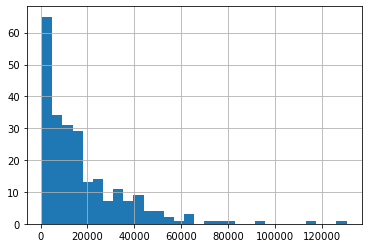

In [28]:
# semicolon gets rid of gibberish at top
gdp_2014['GDP_Per_Capita'].hist(bins=30);

Distribution is positively skewed

13. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

Bottom 5 Countries:
Central African Republic, Burundi, Democratic Republic of Congo, Niger, Malawi

Top 5 Countries:
Brunei, Singapore, Luxembourg, Qatar, China

In [29]:
gdp_2014.sort_values(by='GDP_Per_Capita', ascending=True)

,Country,Year,GDP_Per_Capita
1014,Central African Republic,2014,672.681648
794,Burundi,2014,768.469837
1375,Dem. Rep. Congo,2014,784.872656
4414,Niger,2014,900.136918
3697,Malawi,2014,1142.530804
...,...,...,...
707,Brunei,2014,76448.593329
5316,Singapore,2014,81965.361071
3610,Luxembourg,2014,92349.186429
5003,Qatar,2014,116693.507701


14. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.

In [30]:
# gdp_pivoted = gdp_df.pivot_table(values='GDP_Per_Capita', index='Country')
gdp_pivoted = gdp_df[gdp_df['Year'].isin([1990, 2017])].pivot_table(values='GDP_Per_Capita', index='Country', columns='Year').dropna()

In [31]:
gdp_pivoted.head()

Year,1990,2017
Country,,
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562
Arab World,10491.507721,15542.746104


15. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [32]:
gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]

In [33]:
gdp_pivoted.head()

Year,1990,2017,Percent_Change
Country,,,
Albania,4458.247115,11796.719185,164.604426
Algeria,10300.015042,13822.389087,34.197756
Angola,4761.229638,6044.972035,26.962413
Antigua and Barbuda,17454.549799,22400.379562,28.335476
Arab World,10491.507721,15542.746104,48.145972


16. How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

20 countries

In [34]:
Neg_Percent_Change = gdp_pivoted[gdp_pivoted['Percent_Change'] < 0]
len(Neg_Percent_Change.index) # .index returns row names; len counts these row names 

20

17. Which country had the highest % change in GDP per capita? 

Equitorial Guinea had the highest % change in GDP per capita

Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?

Bonus: Put both line charts on the same plot.

In [35]:
gdp_pivoted.sort_values(by='Percent_Change', ascending=False)

Year,1990,2017,Percent_Change
Country,,,
Equatorial Guinea,1017.764136,22298.942144,2090.973464
China,1521.963868,15253.993071,902.257241
Myanmar,730.228038,5610.324700,668.297629
East Asia & Pacific (excluding high income),2222.407152,13544.178535,509.437318
East Asia & Pacific (IDA & IBRD),2246.661835,13686.880719,509.209651
...,...,...,...
Ukraine,10463.959955,7906.540301,-24.440266
Yemen,3425.707169,2404.422370,-29.812379
Burundi,1027.396660,670.777072,-34.710993


In [36]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


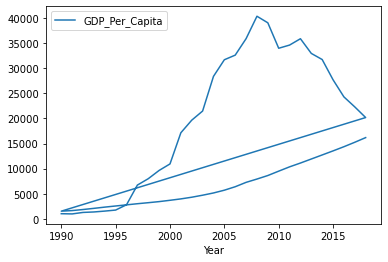

In [37]:
gdp_df[gdp_df['Country'].isin(['Equatorial Guinea', 'China'])].plot.line(x = 'Year', y = 'GDP_Per_Capita')

This line looks crazy. Let's try something else

In [38]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834
...,...,...,...
6724,Zimbabwe,1994,2768.309953
6725,Zimbabwe,1993,2572.870395
6726,Zimbabwe,1992,2591.007534
6727,Zimbabwe,1991,2906.272849


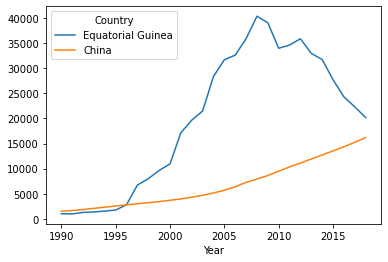

In [39]:
gdp_df.pivot_table(values='GDP_Per_Capita', index='Year', columns='Country').reset_index().plot.line(x='Year', y=['Equatorial Guinea', 'China'])
# reset_index resets index to range from 0-i; treats existing index as a column

Much better! The percent change in GDP for China has been steady since 1990, but the percent change in GDP for Equatorial Guinea has spiked and fallen somewhat dramatically over the past 40 years.

18. Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [40]:
continents = pd.read_csv("../data/continents.csv")

In [41]:
continents

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola
...,...,...
211,Asia,Vietnam
212,Asia,West Bank and Gaza
213,Asia,Yemen
214,Africa,Zambia


19. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [42]:
gdp_df = gdp_df.merge(continents, on='Country')

In [43]:
gdp_df

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2018,1734.723214,Asia
1,Afghanistan,2017,1758.465636,Asia
2,Afghanistan,2016,1757.023490,Asia
3,Afghanistan,2015,1766.593077,Asia
4,Afghanistan,2014,1795.735834,Asia
...,...,...,...,...
5329,Zimbabwe,1994,2768.309953,Africa
5330,Zimbabwe,1993,2572.870395,Africa
5331,Zimbabwe,1992,2591.007534,Africa
5332,Zimbabwe,1991,2906.272849,Africa


20. Determine the number of countries per continent. Create a bar chart showing this.

In [44]:
gdp_df.groupby('Continent').Country.nunique()

Continent
Africa           51
Asia             44
Europe           45
North America    26
Oceania          14
South America    12
Name: Country, dtype: int64

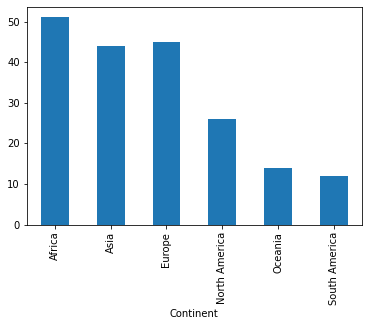

In [45]:
gdp_df.groupby('Continent').Country.nunique().plot(kind="bar")
# nunique() gives unique count

21. Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

In [46]:
gdp_2014_update = gdp_df[gdp_df['Year'] == 2014]

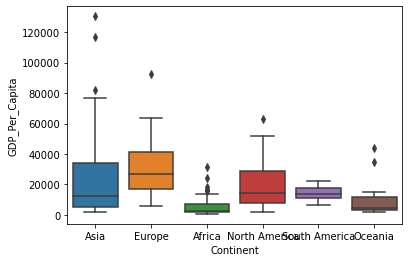

In [47]:
sns.boxplot(x='Continent', y='GDP_Per_Capita', data=gdp_2014_update)

The IQR for Asia is much wider than most. There are quite a few outliers for countries in Africa.

22. Read in internet_use.csv into a DataFrame called internet_df. You will most likely get an error message when doing this - figure out what is going wrong and fix it. Take a look at the first and last five rows and make any corrections to your read_csv() call to fix this. Again, do not modify the original datasets.

In [48]:
internet_df = pd.read_csv("../data/internet_use.csv", nrows=4495)

In [49]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


In [50]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


23. Drop the Value Footnotes column and then rename the columns to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [51]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 140.6+ KB


In [52]:
internet_df = internet_df.drop(columns = "Value Footnotes")

In [53]:
internet_df.head()

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [54]:
internet_df = internet_df.rename(columns={'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'})

In [55]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


24. How many rows and columns does this new dataset have? What are the types of its columns? Ensure that the Internet_Users_Pct column is a numeric data type and fix it if it is not.  

This new dataset has 4495 rows and 3 columns

In [56]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB


25. What is the first year that has a nonzero internet users percentage reported? What is the general trend in internet users percentage over the years. Pick a visualization that you think illustrates this trend well.

In [57]:
internet_df[internet_df['Internet_Users_Pct'] > 0].max() 
# returns largest values for each column (but not necessarily the same row)

Country               Zimbabwe
Year                      2014
Internet_Users_Pct       98.16
dtype: object

In [58]:
internet_df[internet_df['Internet_Users_Pct'] > 0]['Year'].min()

1990

In [59]:
internet_df[internet_df['Internet_Users_Pct'] > 0].sort_values('Year').head(50)

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729
3874,Switzerland,1990,0.595714
2217,Korea (Rep. of),1990,0.023265
3040,Norway,1990,0.707299
2095,Japan,1990,0.020294
3849,Sweden,1990,0.584192


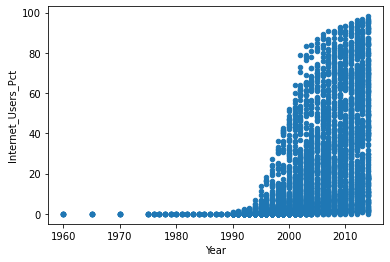

In [60]:
internet_df.plot(kind = 'scatter', x = 'Year', y = 'Internet_Users_Pct');
# gdp_df[gdp_df['Country'].isin(['Equatorial Guinea', 'China'])].plot.line(x = 'Year', y = 'GDP_Per_Capita')

26. Merge gdp_df and internet_df (on Country and Year) into a single DataFrame named gdp_and_internet_use. Keep only countries and years that appear in both tables.  
Difficult Bonus: Do not attempt this part until you have completed all other portions of the data question. Some countries have slightly different names in the internet use and gdp dataframes. For example, the Central African Republic is "Central African Republic" in the gdp dataframe and "Central African Rep." in the internet use dataframe. Find as many instances like this as you can and resolve them so that when merging you keep the maximum number of countries possible.

In [61]:
gdp_and_internet_use = gdp_df.merge(internet_df, on = ['Country', 'Year'])

In [62]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.390000
1,Afghanistan,2013,1807.762344,Asia,5.900000
2,Afghanistan,2012,1772.764974,Asia,5.454545
3,Afghanistan,2011,1626.764793,Asia,5.000000
4,Afghanistan,2010,1671.581238,Asia,4.000000


27. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [63]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3514,Zimbabwe,1997,3036.422224,Africa,0.033080
3515,Zimbabwe,1996,2985.856605,Africa,0.016790
3516,Zimbabwe,1995,2736.486436,Africa,0.007684
3517,Zimbabwe,1994,2768.309953,Africa,0.001739
3518,Zimbabwe,1990,2819.549467,Africa,0.000000


Looks good!

28. Create a new DataFrame, named gdp_and_internet_use_2014 by extracting data for the year 2014 from gdp_and_internet_use. What is the mean internet users percentage in 2014? How many countries have at least 90% internet users in 2014?

In [64]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]
# gdp_2014 = gdp_df[gdp_df['Year'] == 2014]

In [65]:
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.39
13,Albania,2014,10700.993216,Europe,60.10
34,Algeria,2014,13557.769757,Africa,18.09
56,Angola,2014,6813.052106,Africa,21.26
76,Antigua and Barbuda,2014,20440.540555,North America,64.00


In [66]:
gdp_and_internet_use_2014['Internet_Users_Pct'].mean()
# internet_df[internet_df['Internet_Users_Pct'] > 0]['Year'].min()

44.673536463414635

In [67]:
len(gdp_and_internet_use_2014[gdp_and_internet_use_2014['Internet_Users_Pct'] >= 90])

12

In [68]:
gdp_and_internet_use_2014[gdp_and_internet_use_2014['Internet_Users_Pct'] >= 90]

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
228,Bahrain,2014,43846.568554,Asia,90.99998
854,Denmark,2014,45057.083449,Europe,95.99000
1067,Finland,2014,39301.058763,Europe,92.38000
1395,Iceland,2014,42774.888849,Europe,98.16000
1578,Japan,2014,37337.317406,Asia,90.58000
1812,Luxembourg,2014,92349.186429,Europe,94.67000
2199,Netherlands,2014,46238.209707,Europe,93.17000
2310,Norway,2014,63328.259526,Europe,96.30000
2556,Qatar,2014,116693.507701,Asia,91.49000
2992,Sweden,2014,44762.490296,Europe,92.52000


The mean internet users percentage in 2014 is 44.67%. 12 countries have at least 90% internet users in 2014.

29. Find the countries that had the top 3 largest GDP per capita figures for 2014. Create a seaborn FacetGrid showing the change in internet user percentage over time for these five countries. Each individual figure in the facet grid will represent a single country. What trends do you notice? [Note: Create a FacetGrid for the three countries.]  

Qatar, Luxembourg, and Singapore had the top 3 largest GDP per capita figures for 2014.

In [69]:
gdp_and_internet_use_2014.sort_values('GDP_Per_Capita', ascending = False).head()
# internet_df[internet_df['Internet_Users_Pct'] > 0].sort_values('Year').head(50)

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
2556,Qatar,2014,116693.507701,Asia,91.49
1812,Luxembourg,2014,92349.186429,Europe,94.67
2765,Singapore,2014,81965.361071,Asia,82.00
1685,Kuwait,2014,72588.670676,Asia,78.70
2310,Norway,2014,63328.259526,Europe,96.30


In [70]:
gdp_and_internet_use_2014_sort = gdp_and_internet_use_2014.sort_values('GDP_Per_Capita', ascending = False).head(3)

In [71]:
# look at gdp_and_internet_use for Qatar, Luxembourg, and Singapore; graph all three for all years
gdp_and_internet_Qat_Lux_Sin = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(['Qatar', 'Luxembourg', 'Singapore'])]

In [72]:
gdp_and_internet_Qat_Lux_Sin

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
1812,Luxembourg,2014,92349.186429,Europe,94.670000
1813,Luxembourg,2013,90656.380431,Europe,93.776500
1814,Luxembourg,2012,89505.159080,Europe,91.949924
1815,Luxembourg,2011,92005.016836,Europe,90.029859
1816,Luxembourg,2010,91743.293852,Europe,90.620000
...,...,...,...,...,...
2785,Singapore,1994,43835.783293,Asia,1.185204
2786,Singapore,1993,40714.217145,Asia,0.763278
2787,Singapore,1992,37463.009189,Asia,0.471368
2788,Singapore,1991,36201.887548,Asia,0.161504


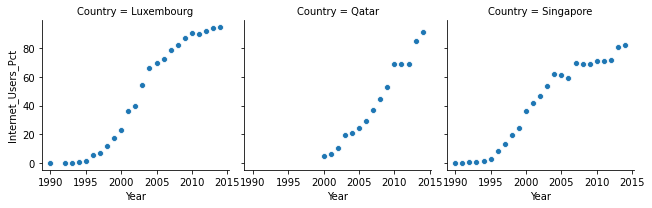

In [73]:
x = sns.FacetGrid(gdp_and_internet_Qat_Lux_Sin, col = 'Country');
x.map(sns.scatterplot, 'Year', 'Internet_Users_Pct');

Luxembourg has had steady growth in internet user percentage since 1994. Singapore has also had pretty steady internet user percentage growth since that time, but internet user percentages seemed to plateau around 2003 and then again around 2007 until jumping up around 2014. Quatar has missing data before 2000, but sharp and steady growth until around 2009 when usage remained the same for 3 years and then jumped up again.

30. Create a scatter plot of Internet Use vs GDP per Capita for the year 2014. What do you notice?

In [74]:
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.39
13,Albania,2014,10700.993216,Europe,60.10
34,Algeria,2014,13557.769757,Africa,18.09
56,Angola,2014,6813.052106,Africa,21.26
76,Antigua and Barbuda,2014,20440.540555,North America,64.00


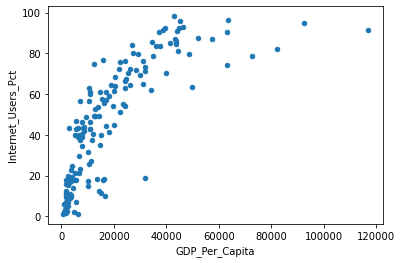

In [75]:
gdp_and_internet_use_2014.plot(kind= 'scatter', x = 'GDP_Per_Capita', y = 'Internet_Users_Pct');

There is a positive relationship between GDP per capita and internet users percentage. We see that in 2014 as a country's GDP per capita rose, the percentage of internet users in the country also increased.

Given that there are more than a few outliers that make this graph appear to curve, this relationship looks arguably strong, but maybe not linear.

31. Find the correlation between GDP per Capita and Internet Use for the year 2014. What is the meaning of this number?

In [76]:
x = gdp_and_internet_use_2014['GDP_Per_Capita']
y = gdp_and_internet_use_2014['Internet_Users_Pct']

In [77]:
x

0        1795.735834
13      10700.993216
34      13557.769757
56       6813.052106
76      20440.540555
            ...     
3411     2837.122659
3431    17131.386907
3455     3828.484887
3475     3684.685507
3497     2506.490220
Name: GDP_Per_Capita, Length: 164, dtype: float64

In [78]:
y

0        6.39
13      60.10
34      18.09
56      21.26
76      64.00
        ...  
3411    18.80
3431    57.00
3455    22.55
3475    17.34
3497    19.89
Name: Internet_Users_Pct, Length: 164, dtype: float64

In [79]:
stats.pearsonr(x, y)

(0.7879885707262839, 5.95710571130819e-36)

The pearson correlation coefficient for the relationship between GDP per capita and internet users percentage in 2014 is .79. This means that there is a strong, positive relationship between GDP per capita and the percentage of internet users in 2014. As GDP per capita increased, there was a high likelihood that we could also expect internet user percentages to increase across countries in 2014.

32. Add a column to gdp_and_internet_use_2014 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and internet users percentage. How does this compare to the calculation in the previous part?

In [80]:
gdp_and_internet_use_2014['log_GDP_Per_Cap'] = np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])

<ipython-input-80-b966d34ba229>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['log_GDP_Per_Cap'] = np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])


In [81]:
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,log_GDP_Per_Cap
0,Afghanistan,2014,1795.735834,Asia,6.39,7.493170
13,Albania,2014,10700.993216,Europe,60.10,9.278092
34,Algeria,2014,13557.769757,Africa,18.09,9.514715
56,Angola,2014,6813.052106,Africa,21.26,8.826595
76,Antigua and Barbuda,2014,20440.540555,North America,64.00,9.925275
...,...,...,...,...,...,...
3411,Vanuatu,2014,2837.122659,Oceania,18.80,7.950546
3431,Venezuela,2014,17131.386907,South America,57.00,9.748668
3455,Yemen,2014,3828.484887,Asia,22.55,8.250224
3475,Zambia,2014,3684.685507,Africa,17.34,8.211940


In [82]:
z = gdp_and_internet_use_2014['log_GDP_Per_Cap']

In [83]:
stats.pearsonr(z, y)

(0.8844322971419836, 1.6923576597584003e-55)

The pearson correlation coefficient for the relationship between GDP per capita and internet users percentage in 2014 is .79. The pearson correlation coefficient for the relationship between the log of GDP per capita and internet users percentage in 2014 is .88. A higher correlation coefficient suggests that the log transformation of the data provides a better fit for a model of this relationship.

33. Filter the original dataset down to just the United States for all available years. Calculate correlation between internet use and gdp per capita. Is this meaningful or useful?

In [84]:
gdp_and_internet_USA = gdp_and_internet_use[gdp_and_internet_use['Country'] == 'United States']

In [85]:
gdp_and_internet_USA

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3343,United States,2014,52080.792568,North America,87.360000
3344,United States,2013,51208.892428,North America,84.200000
3345,United States,2012,50632.443448,North America,79.300000
3346,United States,2011,49883.113984,North America,69.729461
3347,United States,2010,49479.248679,North America,71.690000
3348,United States,2009,48644.151110,North America,71.000000
3349,United States,2008,50349.715322,North America,74.000000
3350,United States,2007,50897.731238,North America,75.000000
3351,United States,2006,50437.806235,North America,68.931193
3352,United States,2005,49512.926789,North America,67.968053


In [86]:
USA_int_use = gdp_and_internet_USA['Internet_Users_Pct']

In [87]:
USA_GDP = gdp_and_internet_USA['GDP_Per_Capita']

In [88]:
stats.pearsonr(USA_int_use, USA_GDP)

(0.9916180229578647, 6.012735160423414e-22)

Calculating the correlation coefficient for the relationship between GDP per capita and internet use percentage in the United States over the years isn't particularly meaningful because (barring a catestrophic historical event that affected access to internet or GDP per capita between 1990 and 2014) we would expect for this relationship to remain relatively unchanged over time. Therefore it is no surprise the the correlation coefficient is almost 1 (which would indicate a perfect relationship).

## Solo Exploration and Presentation:  

Choose and download another data set from the UN data http://data.un.org/Explorer.aspx to merge with your data and explore. Prepare a short (< 5 minute) presentation of your findings. Report any interesting correlations you find. Include visualizations and consider adding interactivity with ipywidgets. This presentation can be done either in a Jupyter Notebook or using another presentation software, such as PowerPoint. (Check out Jupyter Slides if you have time. This allows you to turn your jupyter notebook into a slideshow.

In [89]:
pop_100_plus = pd.read_csv("../data/pop_aged_100_plus.csv")

In [90]:
pop_100_plus

,Country or Area,Year(s),Variant,Value
0,Afghanistan,2014,Medium,0.029
1,Afghanistan,2013,Medium,0.027
2,Afghanistan,2012,Medium,0.024
3,Afghanistan,2011,Medium,0.022
4,Afghanistan,2010,Medium,0.020
...,...,...,...,...
6270,Zimbabwe,1994,Medium,0.003
6271,Zimbabwe,1993,Medium,0.002
6272,Zimbabwe,1992,Medium,0.002
6273,Zimbabwe,1991,Medium,0.002


In [91]:
# gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})
pop_100_plus = pop_100_plus.rename(columns={'Country or Area': 'Country', 'Year(s)': 'Year', 'Value': 'Population_Aged_100+'})

In [98]:
pop_100_plus = pop_100_plus.drop(columns = 'Variant')

In [99]:
pop_100_plus.head()

,Country,Year,Population_Aged_100+
0,Afghanistan,2014,0.029
1,Afghanistan,2013,0.027
2,Afghanistan,2012,0.024
3,Afghanistan,2011,0.022
4,Afghanistan,2010,0.020


In [100]:
gdp_internet_use_100_pop = pd.merge(gdp_and_internet_use, pop_100_plus, how= 'left', left_on= ['Country', 'Year'], right_on= ['Country', 'Year'])

In [101]:
gdp_internet_use_100_pop

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,Population_Aged_100+
0,Afghanistan,2014,1795.735834,Asia,6.390000,0.029
1,Afghanistan,2013,1807.762344,Asia,5.900000,0.027
2,Afghanistan,2012,1772.764974,Asia,5.454545,0.024
3,Afghanistan,2011,1626.764793,Asia,5.000000,0.022
4,Afghanistan,2010,1671.581238,Asia,4.000000,0.020
...,...,...,...,...,...,...
3514,Zimbabwe,1997,3036.422224,Africa,0.033080,0.004
3515,Zimbabwe,1996,2985.856605,Africa,0.016790,0.004
3516,Zimbabwe,1995,2736.486436,Africa,0.007684,0.003
3517,Zimbabwe,1994,2768.309953,Africa,0.001739,0.003


In [107]:
gdp_internet_use_100_pop_1994 = gdp_internet_use_100_pop[gdp_internet_use_100_pop['Year'] == 1994]

In [108]:
gdp_internet_use_100_pop_1994

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,Population_Aged_100+
54,Algeria,1994,9176.235569,Africa,0.000361,0.023
117,Argentina,1994,14546.538787,South America,0.043706,0.619
141,Armenia,1994,1992.015239,Europe,0.009117,0.212
178,Australia,1994,29644.146020,Oceania,2.232101,1.084
203,Austria,1994,32964.102159,Europe,1.393423,0.263
...,...,...,...,...,...,...
3363,United States,1994,38603.651201,North America,4.862781,NaN
3388,Uruguay,1994,11766.475121,South America,0.062474,0.364
3451,Venezuela,1994,15231.183400,South America,0.055487,NaN
3495,Zambia,1994,2031.776457,Africa,0.006776,0.002


In [112]:
gdp_internet_use_100_pop_1994['Population_Aged_100+'].describe()

count    72.000000
mean      0.835931
std       1.545804
min       0.000000
25%       0.035000
50%       0.213500
75%       0.658750
max       8.235000
Name: Population_Aged_100+, dtype: float64

In [117]:
# internet_df[internet_df['Internet_Users_Pct'] > 0].max() 
gdp_internet_use_100_pop_1994[gdp_internet_use_100_pop_1994['Population_Aged_100+'] > 8.20].max()

Country                      India
Year                          1994
GDP_Per_Capita             2096.06
Continent                     Asia
Internet_Users_Pct      0.00106956
Population_Aged_100+         8.235
dtype: object

In 1994, the average number of people aged 100 years old or more worldwide was 835. The median number of people aged 100+ years old worldwide for this year was 213. In 1994, India was home to the greatest amount of super seniors with 8,235 people aged 100 years or more!

In [109]:
gdp_internet_use_100_pop_2014 = gdp_internet_use_100_pop[gdp_internet_use_100_pop['Year'] == 2014]

In [110]:
gdp_internet_use_100_pop_2014

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,Population_Aged_100+
0,Afghanistan,2014,1795.735834,Asia,6.39,0.029
13,Albania,2014,10700.993216,Europe,60.10,0.039
34,Algeria,2014,13557.769757,Africa,18.09,0.528
56,Angola,2014,6813.052106,Africa,21.26,0.027
76,Antigua and Barbuda,2014,20440.540555,North America,64.00,0.004
...,...,...,...,...,...,...
3411,Vanuatu,2014,2837.122659,Oceania,18.80,0.000
3431,Venezuela,2014,17131.386907,South America,57.00,NaN
3455,Yemen,2014,3828.484887,Asia,22.55,0.061
3475,Zambia,2014,3684.685507,Africa,17.34,0.005


In [118]:
gdp_internet_use_100_pop_2014['Population_Aged_100+'].describe()

count    152.000000
mean       1.885796
std        6.405706
min        0.000000
25%        0.008000
50%        0.122000
75%        0.748250
max       52.987000
Name: Population_Aged_100+, dtype: float64

In [124]:
gdp_internet_use_100_pop_2014[gdp_internet_use_100_pop_2014['Population_Aged_100+'] > 52].max()

Country                   Japan
Year                       2014
GDP_Per_Capita          37337.3
Continent                  Asia
Internet_Users_Pct        90.58
Population_Aged_100+     52.987
dtype: object

In 2014, the average number of people aged 100 years old or more worldwide was 1.885. The median number of people aged 100+ years old worldwide for this year was 122. In 2014, Japan was home to the greatest amount of super seniors with 52,987 people aged 100 years or more! *NOTE: Check on this with Michael or a TA...

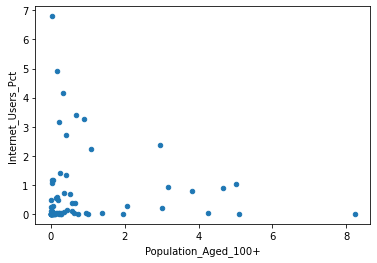

In [127]:
gdp_internet_use_100_pop_1994.plot(kind= 'scatter', x = 'Population_Aged_100+', y = 'Internet_Users_Pct');

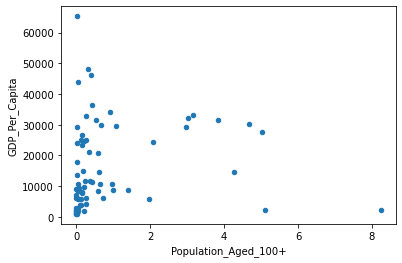

In [128]:
gdp_internet_use_100_pop_1994.plot(kind= 'scatter', x = 'Population_Aged_100+', y = 'GDP_Per_Capita');

In [131]:
pop_age_100_1994 = gdp_internet_use_100_pop_1994['Population_Aged_100+']

In [132]:
gdp_pop_1994 = gdp_internet_use_100_pop_1994['GDP_Per_Capita']

In [135]:
# impute for Pop_Aged_100+
pop_age_100_1994_dropna = gdp_internet_use_100_pop_1994.dropna(subset=['Population_Aged_100+'])
# drop na for GDP_Per_Capita
gdp_pop_1994_dropna = gdp_internet_use_100_pop_1994.dropna(subset=['GDP_Per_Capita'])

In [136]:
stats.pearsonr(pop_age_100_1994_dropna, gdp_pop_1994_dropna)

ValueError: x and y must have the same length.

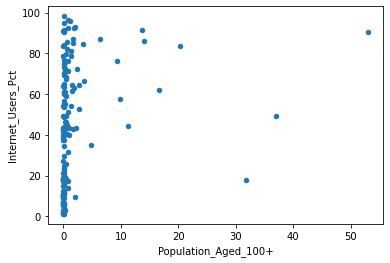

In [126]:
gdp_internet_use_100_pop_2014.plot(kind= 'scatter', x = 'Population_Aged_100+', y = 'Internet_Users_Pct');

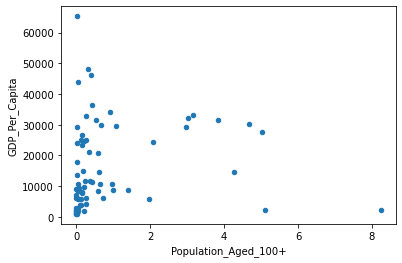

In [129]:
gdp_internet_use_100_pop_1994.plot(kind= 'scatter', x = 'Population_Aged_100+', y = 'GDP_Per_Capita');

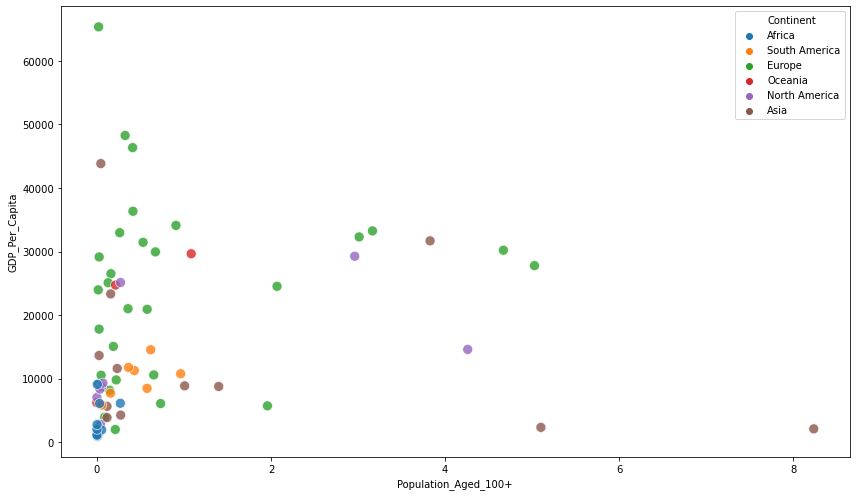

In [160]:
plt.figure(figsize = (12,7))
sns.scatterplot(data = gdp_internet_use_100_pop_1994, x = 'Population_Aged_100+', y = 'GDP_Per_Capita', s = 100, hue = 'Continent', alpha = 0.8);

plt.tight_layout() # removes extra margins around the edges
plt.savefig('pop_over_100 vs GDP_per_cap_1994.png', dpi = 150);

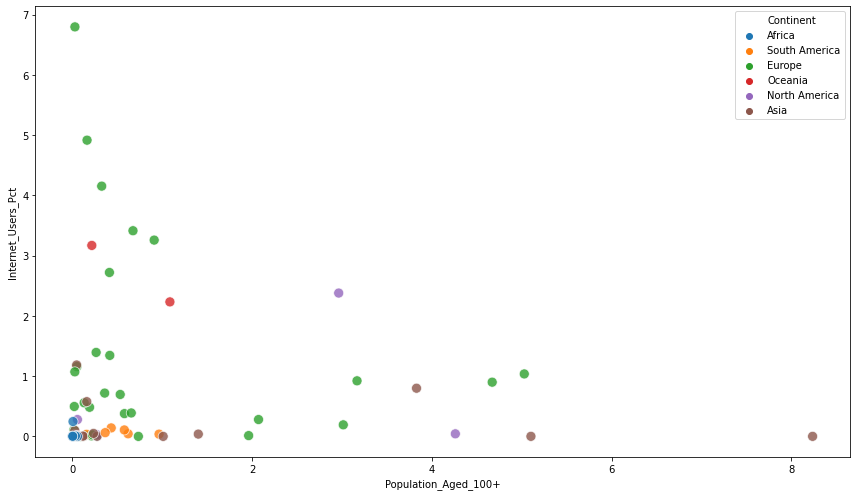

In [163]:
plt.figure(figsize = (12,7))
sns.scatterplot(data = gdp_internet_use_100_pop_1994, x = 'Population_Aged_100+', y = 'Internet_Users_Pct', s = 100, hue = 'Continent', alpha = 0.8);

plt.tight_layout() # removes extra margins around the edges
plt.savefig('pop_over_100 vs int_users_1994.png', dpi = 150);

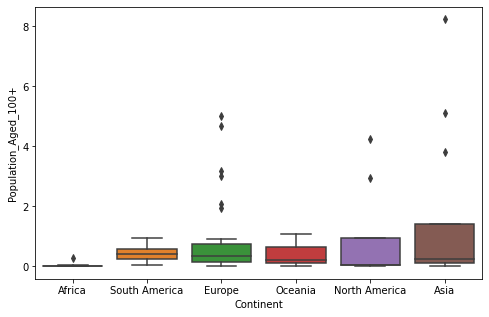

In [142]:
plt.figure(figsize = (8,5))
sns.boxplot(x='Continent', y='Population_Aged_100+', data=gdp_internet_use_100_pop_1994);

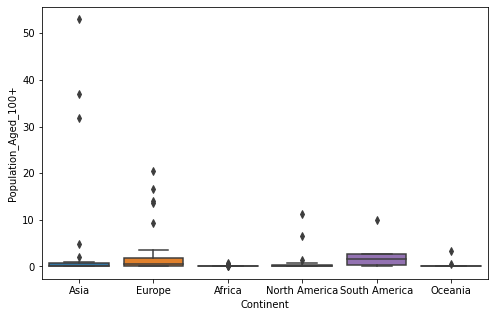

In [141]:
plt.figure(figsize = (8,5))
sns.boxplot(x='Continent', y='Population_Aged_100+', data=gdp_internet_use_100_pop_2014);

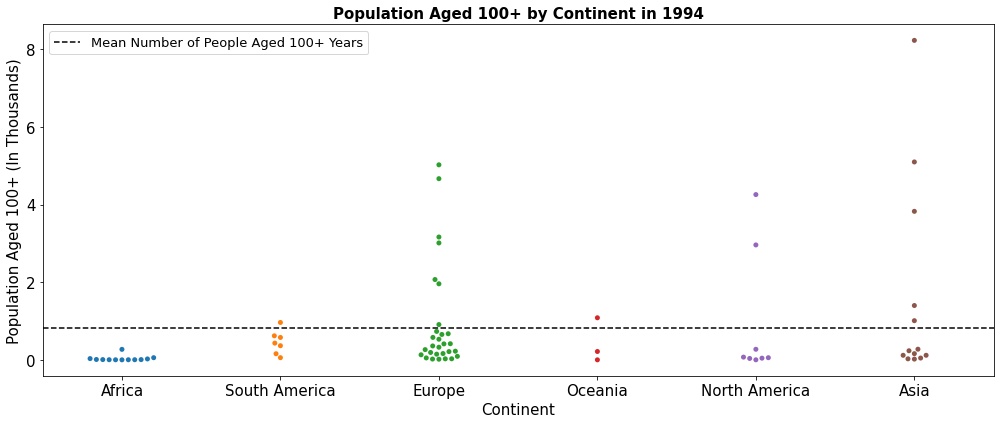

In [165]:
fontsize = 15

plt.subplots(figsize = (14, 6))
sns.swarmplot(data = gdp_internet_use_100_pop_1994, x = 'Continent', y = 'Population_Aged_100+')
plt.xticks(fontsize = fontsize)
plt.xlabel('Continent', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('Population Aged 100+ (In Thousands)', fontsize = fontsize)
plt.title('Population Aged 100+ by Continent in 1994', fontsize = fontsize, fontweight = 'bold');

xmin, xmax = plt.xlim() # outputs current values for list as a tuple; can unpack xmin and xmax components
plt.hlines(y = 0.83, xmin = xmin, xmax = xmax, linestyle = '--', label = 'Mean Number of People Aged 100+ Years')
plt.legend(loc = 'upper left', fontsize = fontsize - 2); # add legend along with label

plt.tight_layout() # removes extra margins around the edges
plt.savefig('swarmplot_1994', dpi = 150);

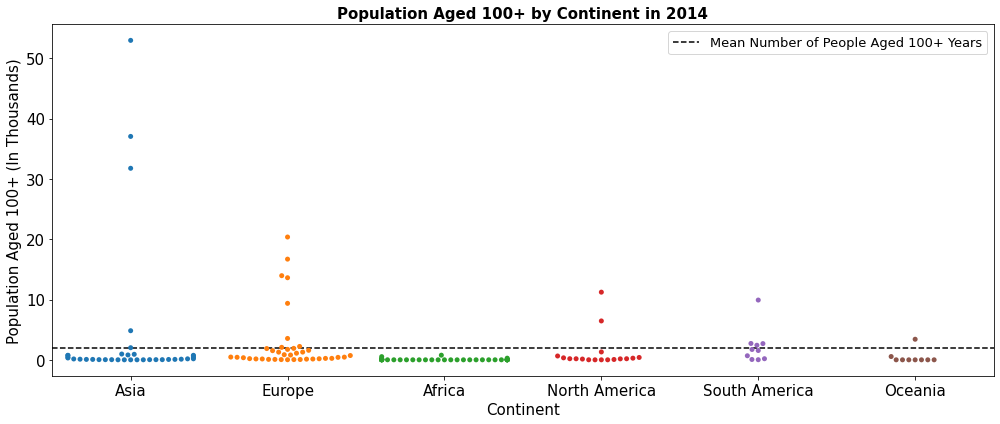

In [167]:
fontsize = 15

plt.subplots(figsize = (14, 6))
sns.swarmplot(data = gdp_internet_use_100_pop_2014, x = 'Continent', y = 'Population_Aged_100+')
plt.xticks(fontsize = fontsize)
plt.xlabel('Continent', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('Population Aged 100+ (In Thousands)', fontsize = fontsize)
plt.title('Population Aged 100+ by Continent in 2014', fontsize = fontsize, fontweight = 'bold');

xmin, xmax = plt.xlim() # outputs current values for list as a tuple; can unpack xmin and xmax components
plt.hlines(y = 1.88, xmin = xmin, xmax = xmax, linestyle = '--', label = 'Mean Number of People Aged 100+ Years')
plt.legend(loc = 'upper right', fontsize = fontsize - 2); # add legend along with label

plt.tight_layout() # removes extra margins around the edges
plt.savefig('swarmplot_2014_new', dpi = 150);

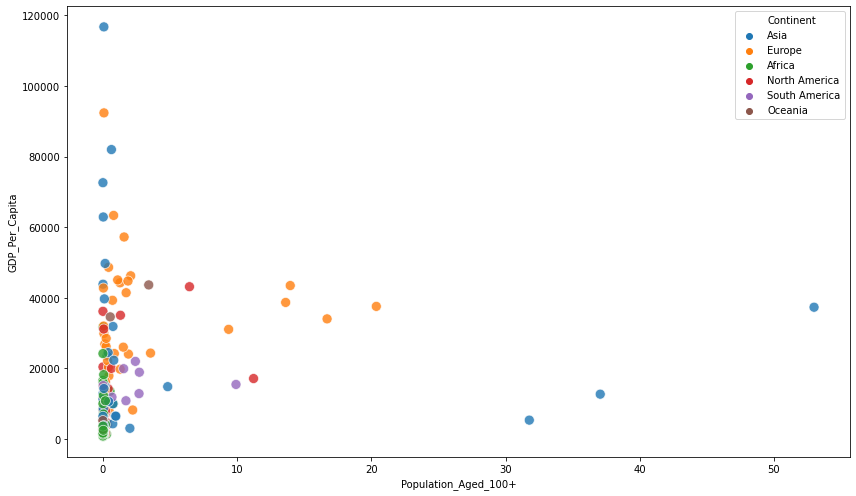

In [162]:
plt.figure(figsize = (12,7))
sns.scatterplot(data = gdp_internet_use_100_pop_2014, x = 'Population_Aged_100+', y = 'GDP_Per_Capita', s = 100, hue = 'Continent', alpha = 0.8);

plt.tight_layout() # removes extra margins around the edges
plt.savefig('pop_over_100 vs GDP_per_cap_2014.png', dpi = 150);

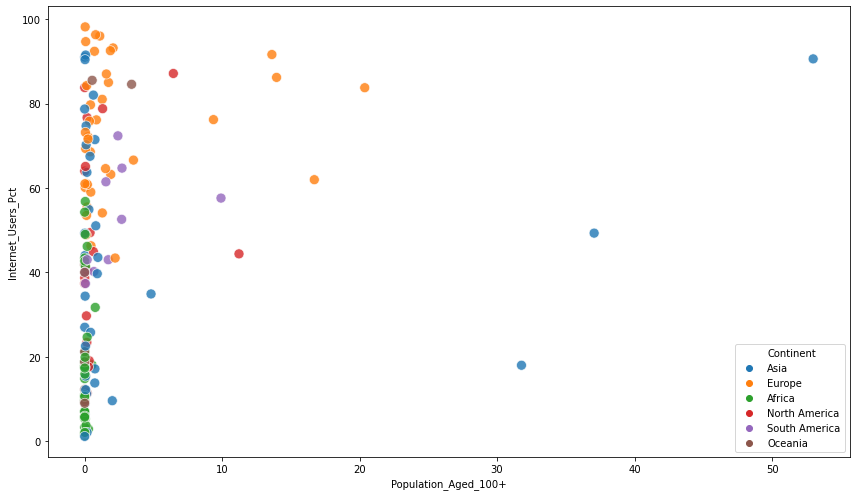

In [164]:
plt.figure(figsize = (12,7))
sns.scatterplot(data = gdp_internet_use_100_pop_2014, x = 'Population_Aged_100+', y = 'Internet_Users_Pct', s = 100, hue = 'Continent', alpha = 0.8);

plt.tight_layout() # removes extra margins around the edges
plt.savefig('pop_over_100 vs int_users_2014.png', dpi = 150);